# Computational Finance
## Series 5
Tientso Ning

In [18]:
import numpy as np
import statsmodels.graphics.tsaplots
import matplotlib.pyplot as plt

In [19]:
def maslov (itr, r, K):
    
    '''
    simulates a maslov model, generating the appropriate data for us to plot
    '''
    
    ts = []
    b = []
    a = []
    buy = 20
    sell = 20
    px = 20
    
    for i in range (1, itr+1):
        
        #establish market values
        #buy = np.random.randint(30,40)
        #sell = np.random.randint(20,30)
        
        if(np.around(np.random.random())):
            #buy
            if(np.random.random() < (1-r)):
                #market order
                buy = buy
                px = buy
            else:
                #limit order
                buy = px - K
        
        else:
            #sell
            if(np.random.random() < (1-r)):
                #market order
                sell = sell
                px = sell
            else:
                #limit order
                sell = px + K
        
        ts.append(i) #single trader
        b.append(buy)
        a.append(sell)

    return ts, b, a

In [20]:
ts_, bid, ask = maslov(1000, 0.5, 1)

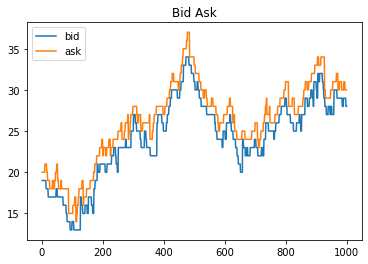

In [21]:
plt.plot(ts_, bid, label="bid")
plt.plot(ts_, ask, label="ask")
plt.legend()
plt.title("Bid Ask")
plt.show()

In [47]:
def returns (x):
    
    rets = []
    for i in range(1, len(x)):
        try:
            rets.append((x[i]-x[i-1])/x[i-1])
        except:
            rets.append(0)
    return rets

In [40]:
ret_bid = returns(bid)
ret_ask = returns(ask)

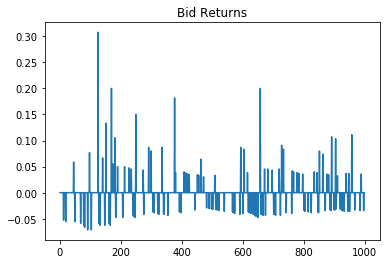

In [41]:
plt.plot(ret_bid)
plt.title("Bid Returns")
plt.show()

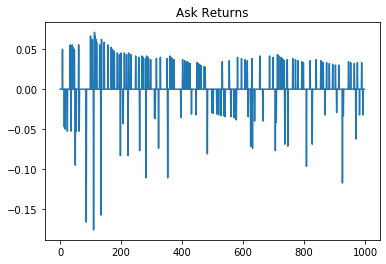

In [42]:
plt.plot(ret_ask)
plt.title("Ask Returns")
plt.show()

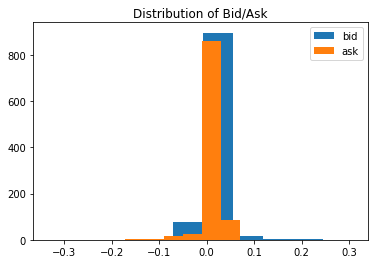

In [30]:
plt.hist(ret_bid, label="bid")
plt.hist(ret_ask, label="ask")
plt.title("Distribution of Bid/Ask")
plt.legend()
plt.show()

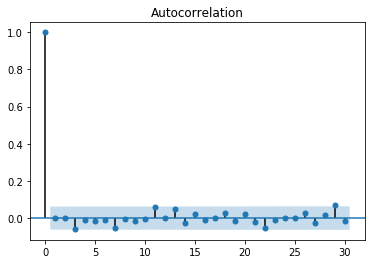

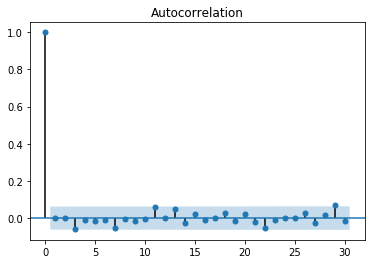

In [27]:
statsmodels.graphics.tsaplots.plot_acf(np.asarray(ret_bid))

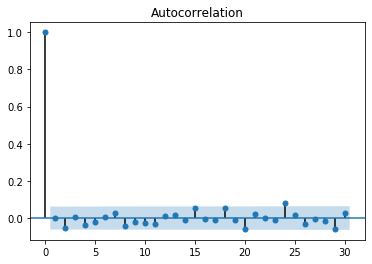

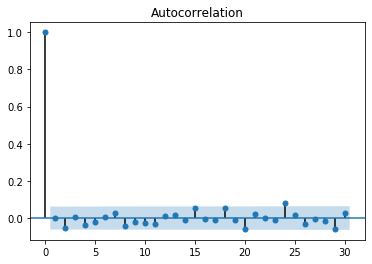

In [28]:
statsmodels.graphics.tsaplots.plot_acf(np.asarray(ret_ask))

###### 1. Are there any differences between the mid price and the market price?
The market price is the best prices offered at the current time (for bid and ask), and the mid price is the average between the two market prices (of bid and ask). We can see that in this set up, a limit order will be bigger or smaller than the current market price, but the market prices will always be bigger or smaller (depending on bid or ask) than the mid price.

###### 2. What do you observe from the time series of the return?
The time series of the returns centers around zero, and spikes up and down occasionally, and looks similar to a normal distribution. This makes sense since the distribution we chose for the probability of placing market vs limit orders is normal.

###### 3. Are there differences between the distribution of the return and the normal distribution?
The standard deviation seems rather small compared to something we usually see in an usual normal distribution.

###### 4. What do you observe from the autocorrelation plot?
We notice that the ACF looks like something we have been seeing from actual data, which is really neat since the data is generated from such a simple model. We notice that it follows what we usually expect to see from an ACF, that there is a shift from positive to negative, and that at certain points, the values are considered significant.

Text(0.5, 1.0, 'Mid Prices vs Market Prices')

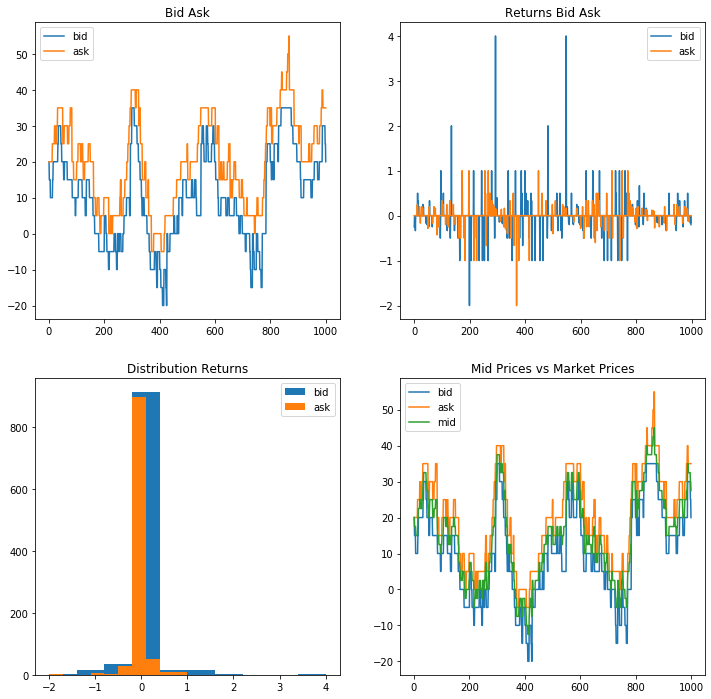

In [114]:
# just some visualization tests
test_ts, test_bid, test_ask = maslov(1000, 0.5, 5)
test_ret_bid = returns(test_bid)
test_ret_ask = returns(test_ask)
test_mid = (np.asarray(test_bid)+np.asarray(test_ask))/2
f, ax = plt.subplots(2,2, figsize=(12,12))
ax[0][0].plot(test_ts, test_bid, label="bid")
ax[0][0].plot(test_ts, test_ask, label="ask")
ax[0][0].legend()
ax[0][0].set_title("Bid Ask")
ax[0][1].plot(test_ret_bid, label="bid")
ax[0][1].plot(test_ret_ask, label="ask")
ax[0][1].legend()
ax[0][1].set_title("Returns Bid Ask")
ax[1][0].hist(test_ret_bid, label="bid")
ax[1][0].hist(test_ret_ask, label="ask")
ax[1][0].legend()
ax[1][0].set_title("Distribution Returns")
ax[1][1].plot(test_ts, test_bid, label="bid")
ax[1][1].plot(test_ts, test_ask, label="ask")
ax[1][1].plot(test_ts, test_mid, label="mid")
ax[1][1].legend()
ax[1][1].set_title("Mid Prices vs Market Prices")